In [142]:
%load_ext autoreload
%autoreload 2

from KohonenNetwork import KohonenNetwork
from _csv import reader
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Grouping Countries
## Parameters
kohonen_net_size => Size of the Kohonen network. It's one value that will vreate a squared matrix
use_weighted_entries => It will define if we use random W initialization or not
kohonen_train_epochs => Times the Kohonen network will train

In [143]:
kohonen_net_size: int = 7
use_weighted_entries: bool = True
kohonen_train_epochs: int = 500 * 7

## Loading data

In [144]:
with open('europe.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    raw_data = list(csv_reader)
    headers =  np.array(raw_data[:1]).T[1:].flatten()
    countries = np.array(raw_data[1:]).T[:1].flatten()
    data = np.array(raw_data[1:]).T[1:].T.astype(float)

## Train the network

In [145]:
from KohonenNetwork import KohonenNetwork

net = KohonenNetwork(kohonen_net_size,data, use_weighted_entries)
net.train(kohonen_train_epochs)

## Print

In [146]:
groups = np.empty((kohonen_net_size,kohonen_net_size)).tolist()
for i in range(kohonen_net_size):
    for j in range(kohonen_net_size):
        groups[i][j] = []

for idx,country in enumerate(countries):
    i,j = net.classify(net.values[idx])
    groups[i][j] += [country]

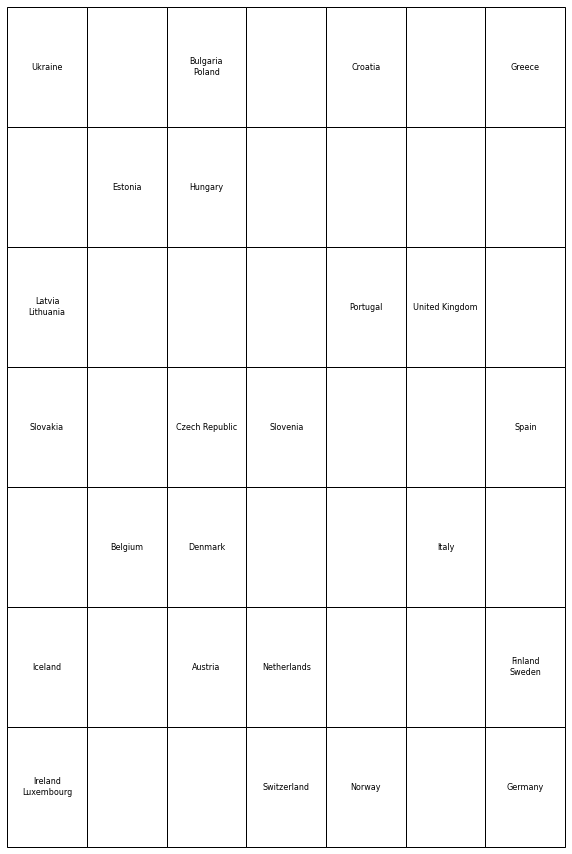

In [147]:
import matplotlib.pyplot as plt

cell_text = []

for row in groups:
    cell_text.append([str.join("\n",item) for item in row])

plt.figure(
    linewidth=2,
    figsize=(10,5)
)
the_table = plt.table(
    cellText=cell_text,
    cellLoc='center',
    loc='center'
)

the_table.scale(1, 10)# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)# Hide axes border
plt.box(on=None)
plt.draw()
fig = plt.gcf()
plt.show()

# Distancias entre neuronas

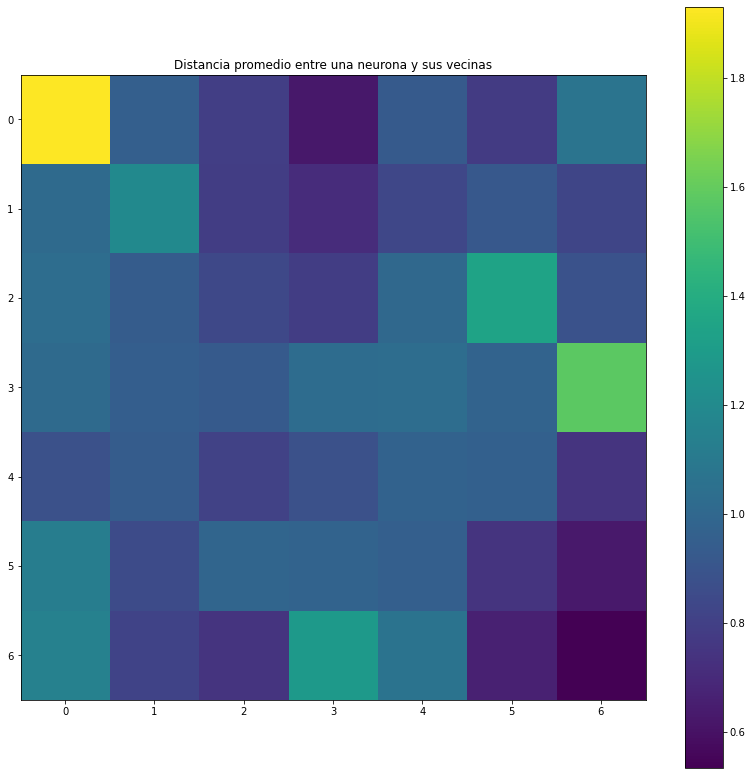

In [150]:
plt.figure(figsize=(kohonen_net_size*2,kohonen_net_size*2))
plt.xticks(np.arange(0, float(kohonen_net_size) + 0), range(kohonen_net_size))
plt.yticks(np.arange(0, float(kohonen_net_size) + 0), range(kohonen_net_size))
plt.title("Distancia promedio entre una neurona y sus vecinas")
plt.imshow(np.squeeze(net.distance_matrix()))
plt.colorbar()
plt.show()

## Mapas auto organizados

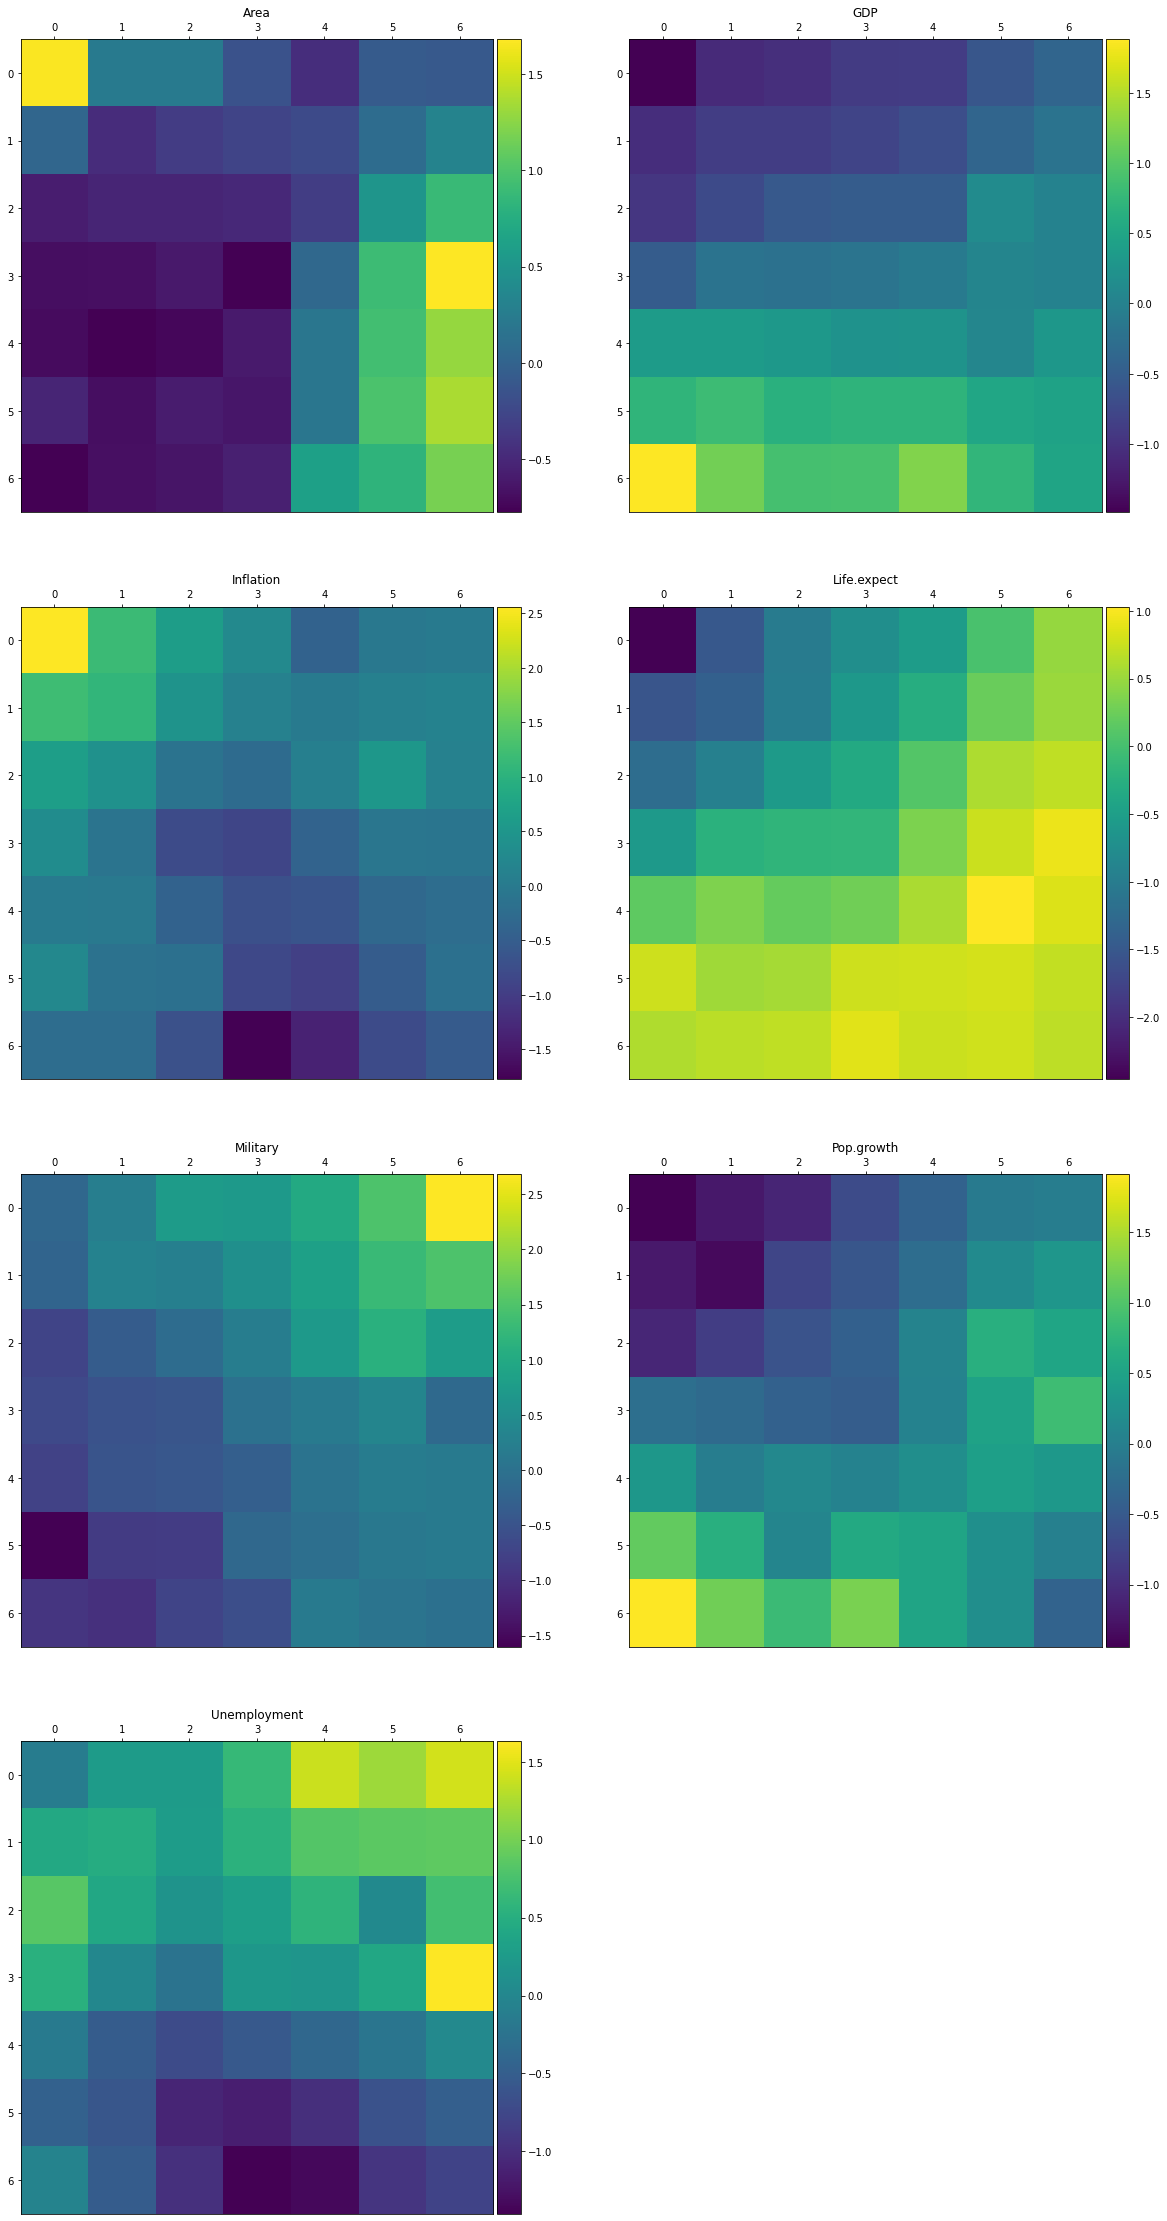

In [149]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axs = plt.subplots(4,2,figsize=(20,40))
aa = lambda x: (int(x / 2),int(x%2))
fig.delaxes(axs[aa(7)])

for i, header in enumerate(headers):
    data = np.array([net.w[x,y,i] for x,y in np.ndindex((kohonen_net_size,kohonen_net_size))]).reshape(kohonen_net_size,kohonen_net_size)
    chart = axs[aa(i)]
    chart.set_title(header)
    im = chart.imshow(np.squeeze(data))
    divider = make_axes_locatable(chart)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    chart.set_xticks(np.arange(kohonen_net_size))
    chart.set_yticks(np.arange(kohonen_net_size))
    chart.xaxis.tick_top()